In [1]:
!poetry add pyarrow # to load parquets
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  • pyarrow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  • seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

In [3]:
data_path = "../../data/"

# 1. Quick overview of the different datasets
## 1.1 Inventory Dataset

In [4]:
df_inventory = pd.read_parquet(data_path + "inventory.parquet")
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [5]:
df_inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


No nulls and the types are correct.

In [6]:
df_inventory.describe()

,variant_id,price,compare_at_price
count,1.733000e+03,1733.000000,1733.000000
mean,3.694880e+13,6.307351,7.028881
std,2.725674e+12,7.107218,7.660542
min,3.361529e+13,0.000000,0.000000
25%,3.427657e+13,2.490000,2.850000
50%,3.927260e+13,3.990000,4.490000
75%,3.948318e+13,7.490000,8.210000
max,4.016793e+13,59.990000,60.000000


In [7]:
df_inventory["price"].value_counts()

price
2.99     86
1.99     72
0.00     71
3.99     66
4.49     65
         ..
1.65      1
0.87      1
11.35     1
1.36      1
15.39     1
Name: count, Length: 179, dtype: int64

There are a lot of products with price 0.00. Why? Are they gifts? New products
with no assigned price?

## 1.2 Orders Dataset

In [8]:
df_orders = pd.read_parquet(data_path + "orders.parquet")
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


No nulls and data types seem correct.\
We do notice that the indexes go from 10 to 64538, and we only got 8773 of\
them, which means that it could be a subset of the original data set.

In [9]:
df_orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


There is no quantity in ordered_items. This could mean that if an item is bought\
two times, its id has to be added two times.

## 1.3 Regulars Dataset

In [10]:
df_regulars = pd.read_parquet(data_path + "regulars.parquet")
df_regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


No nulls and data types seem correct.\
Same as orders, we don't have all the index entries, this could be only a subset\
of the original data set.

In [11]:
df_regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


Also, there is no quantity. If a product has to be added to regular two times,
there will be two entries.

## 1.4 Abandoned Carts Dataset

In [12]:
df_abandoned_carts = pd.read_parquet(data_path + "abandoned_carts.parquet")
df_abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


No nulls and data types seem correct.\
The same thing happens with the indexes.

In [13]:
df_abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


## 1.5 Users Dataset

In [14]:
df_users = pd.read_parquet(data_path + "users.parquet")
df_users.info()
# first_ordered_at and customer_cohort_month data types could be changed
# to datetime
# There are null values on user_nuts1 and all the
# count_ columns

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


There are nulls values in `user_nuts1` and all `count_...` columns.\
Also, `first_ordered_at` and `customer_cohort_mont` columns are dates, so their\
datatypes could be changed to datetime.\

In [15]:
df_users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


The reason for the null values could be that the users had to fill a\
questionnaire, and that those columns were optional.

# 2. Analysis of the Datasets

1. Restore orders with inventory information and analyse most sold products,
   categories and vendors.
2. User profiling.

## 2.1 Orders analysis
Hypothesis:
- There are some products, categories and vendors that customers like and buy.

In [16]:
df_orders.head(2)

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."


In [17]:
# Each row represents an order with all the products inside of it
# Transform it so that each product + order is a row
exploded_orders = df_orders.explode("ordered_items").rename(
    columns={"ordered_items": "variant_id"}
)
exploded_orders.head(2)

,id,user_id,created_at,order_date,user_order_seq,variant_id
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588


Get each product's information for all orders.

In [18]:
order_items = pd.merge(exploded_orders, df_inventory, how="left", on="variant_id")
order_items.head(3)

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828,NaN,NaN,NaN,NaN,NaN
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588,NaN,NaN,NaN,NaN,NaN
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452,NaN,NaN,NaN,NaN,NaN


In [19]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107958 entries, 0 to 107957
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                107958 non-null  int64         
 1   user_id           107958 non-null  object        
 2   created_at        107958 non-null  datetime64[us]
 3   order_date        107958 non-null  datetime64[us]
 4   user_order_seq    107958 non-null  int64         
 5   variant_id        107958 non-null  object        
 6   price             92361 non-null   float64       
 7   compare_at_price  92361 non-null   float64       
 8   vendor            92361 non-null   object        
 9   product_type      92361 non-null   object        
 10  tags              92361 non-null   object        
dtypes: datetime64[us](2), float64(2), int64(2), object(5)
memory usage: 9.1+ MB


We notice there are lots of nulls in those columns we added to get the product's\
information. This means that not all products in the orders are in the inventory.

In [20]:
print(
    f" Percentage of product items in orders that are not in inventory: {100*order_items.price.isna().sum() / order_items.index.size}%"
)

 Percentage of product items in orders that are not in inventory: 14.447285055299282%


In [21]:
order_items_with_price = order_items.dropna()
order_items_with_price.head(3)

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."


Text(0, 0.5, 'quantity')

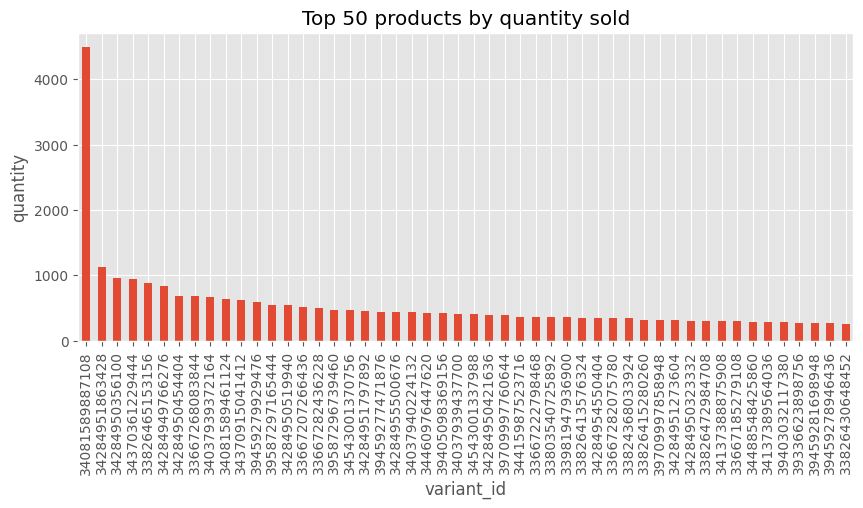

In [22]:
top_order_items_by_quantity = order_items_with_price["variant_id"].value_counts()
top_order_items_by_quantity.iloc[:50].plot(kind="bar", figsize=(10, 4))
plt.title("Top 50 products by quantity sold")
plt.xlabel("variant_id")
plt.ylabel("quantity")

Text(0, 0.5, 'revenue')

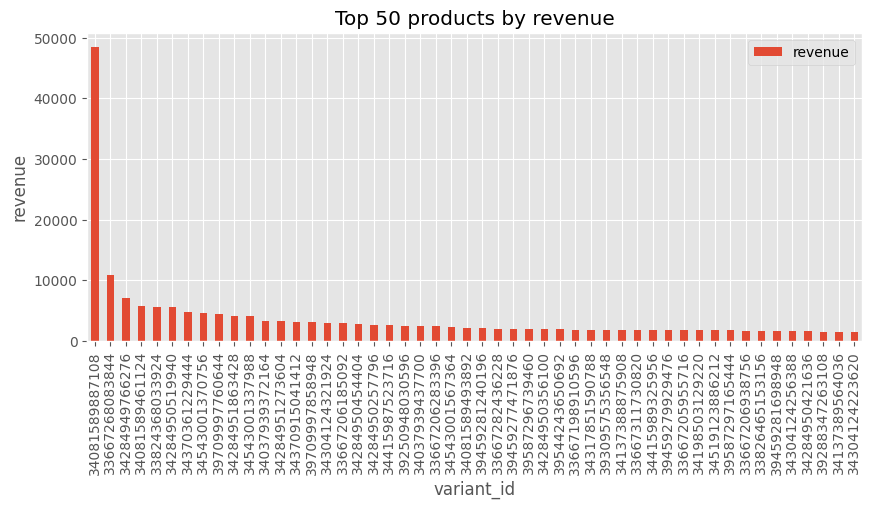

In [23]:
top_order_items_by_revenue = (
    order_items_with_price.groupby("variant_id")["price"]
    .sum()
    .reset_index()
    .rename(columns={"price": "revenue"})
    .sort_values(by="revenue", ascending=False)
)
top_order_items_by_revenue.iloc[:50].plot(
    kind="bar", x="variant_id", y="revenue", figsize=(10, 4)
)
plt.title("Top 50 products by revenue")
plt.xlabel("variant_id")
plt.ylabel("revenue")

In [24]:
merged_inventory = (
    df_inventory.merge(top_order_items_by_revenue, how="left", on="variant_id")
    .merge(top_order_items_by_quantity, how="left", on="variant_id")
    .rename(columns={"count": "units_sold"})
)

In [25]:
merged_inventory.sort_values(by="revenue", ascending=False).iloc[:10]

,variant_id,price,compare_at_price,vendor,product_type,tags,revenue,units_sold
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",48414.73,4487.0
18,33667268083844,15.99,19.99,persil,washing-powder,[washing-powder],10921.17,683.0
109,34284949766276,8.49,9.00,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls],7114.62,838.0
203,34081589461124,8.99,10.14,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",5771.58,642.0
141,33824368033924,15.99,19.99,persil,washing-powder,[washing-powder],5516.55,345.0
300,34284950519940,9.99,12.00,fairy,dishwashing,[dishwasher-tablets],5504.49,551.0
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",4685.61,939.0
190,34543001370756,9.99,13.00,fairy,washing-capsules,"[discontinue, trade-swap, washing-capsules]",4675.32,468.0
43,39709997760644,11.49,12.23,cocacola,soft-drinks-mixers,"[fizzy-drinks, gluten-free, vegan]",4492.59,391.0
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],4180.77,1133.0


Top 10 most revenue earned products

In [26]:
merged_inventory.sort_values(by="units_sold", ascending=False).iloc[:10]

,variant_id,price,compare_at_price,vendor,product_type,tags,revenue,units_sold
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",48414.73,4487.0
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],4180.77,1133.0
928,34284950356100,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]",1898.46,954.0
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",4685.61,939.0
116,33826465153156,1.89,1.99,clearspring,tins-packaged-foods,"[gluten-free, meat-alternatives, vegan]",1670.76,884.0
109,34284949766276,8.49,9.00,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls],7114.62,838.0
18,33667268083844,15.99,19.99,persil,washing-powder,[washing-powder],10921.17,683.0
86,34284950454404,3.99,7.50,lenor,fabric-softener-freshener,[fabric-softener-freshener],2725.17,683.0
241,34037939372164,4.99,5.25,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls],3308.37,663.0
203,34081589461124,8.99,10.14,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",5771.58,642.0


Top 10 most sold products

Text(0, 0.5, 'quantity')

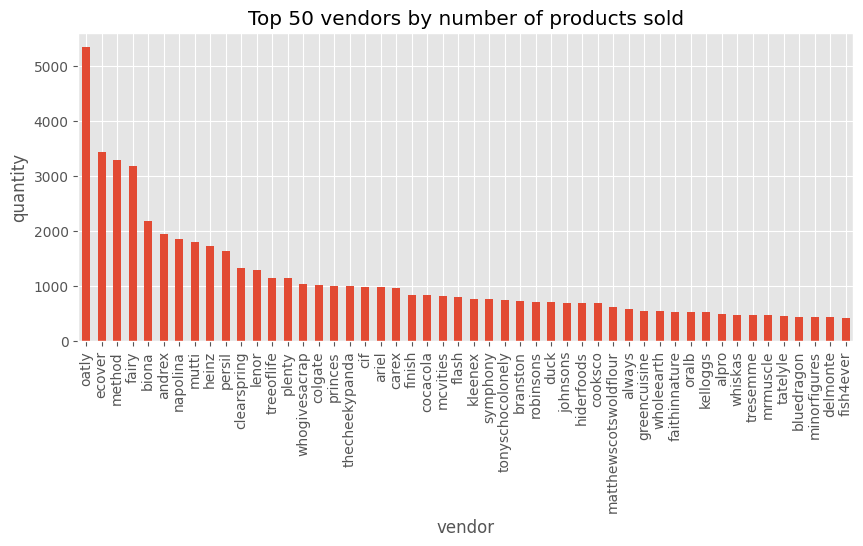

In [27]:
top_vendors_by_products_sold = order_items_with_price["vendor"].value_counts()
top_vendors_by_products_sold.iloc[:50].plot(kind="bar", figsize=(10, 4))
plt.title("Top 50 vendors by number of products sold")
plt.xlabel("vendor")
plt.ylabel("quantity")

Text(0, 0.5, 'quantity')

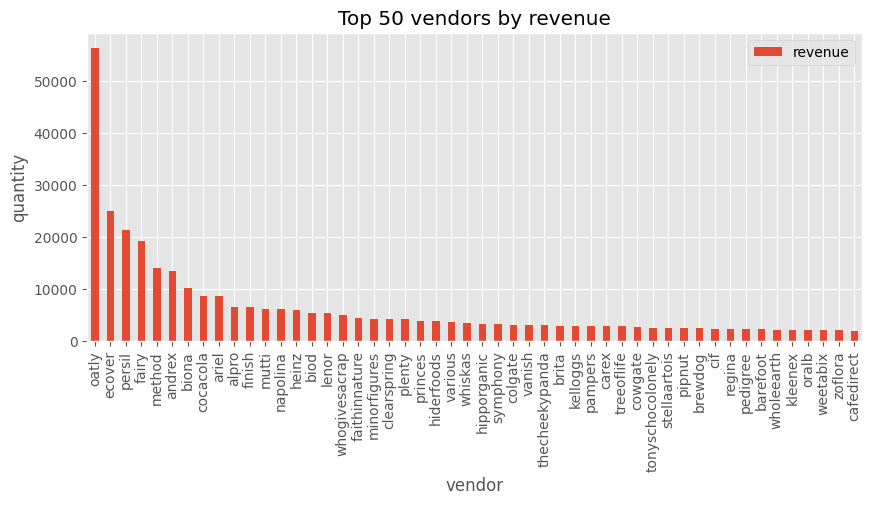

In [28]:
top_vendors_by_products_revenue = (
    order_items_with_price.groupby("vendor")
    .agg({"price": "sum"})
    .rename(columns={"price": "revenue"})
    .sort_values(by="revenue", ascending=False)
)
top_vendors_by_products_revenue.iloc[:50].plot(kind="bar", figsize=(10, 4))
plt.title("Top 50 vendors by revenue")
plt.xlabel("vendor")
plt.ylabel("quantity")

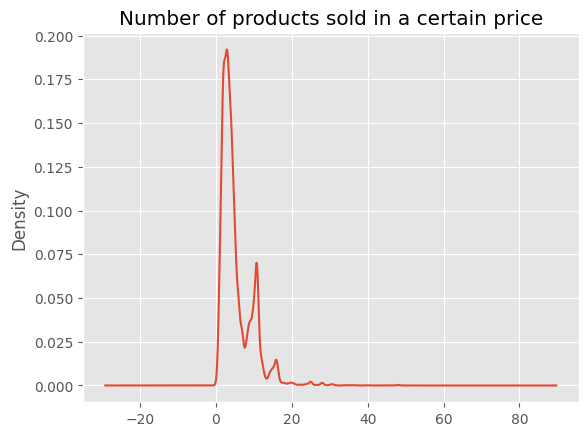

In [29]:
order_items.price.plot(kind="density")
plt.title("Number of products sold in a certain price")
plt.show()

Most of the products that sold are in the 0 to 8 price range. However,\
there are certain alterations like in the 10 price, that could be caused by the\
most sold product which is the oatly milk.

Text(0, 0.5, 'quantity')

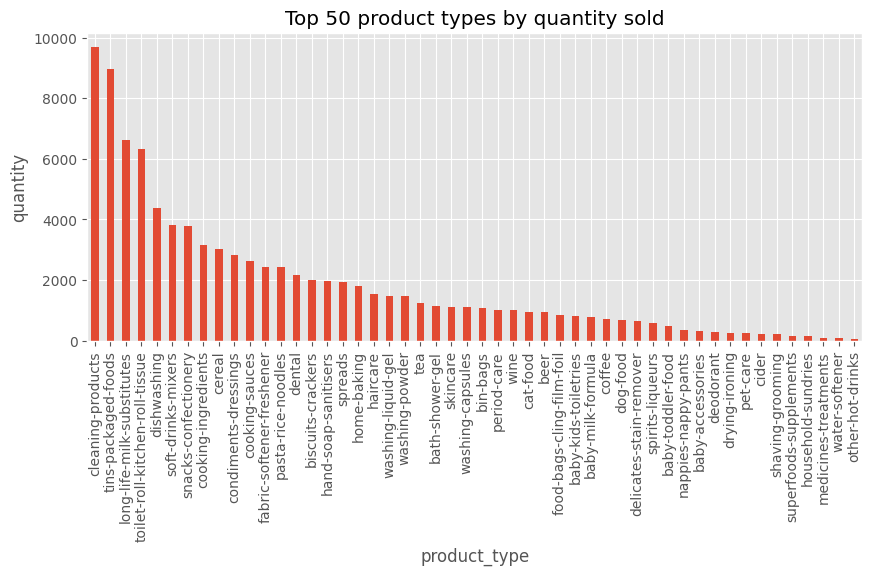

In [30]:
top_product_type_by_quantity = order_items_with_price["product_type"].value_counts()
top_product_type_by_quantity.iloc[:50].plot(kind="bar", figsize=(10, 4))
plt.title("Top 50 product types by quantity sold")
plt.xlabel("product_type")
plt.ylabel("quantity")

Text(0, 0.5, 'revenue')

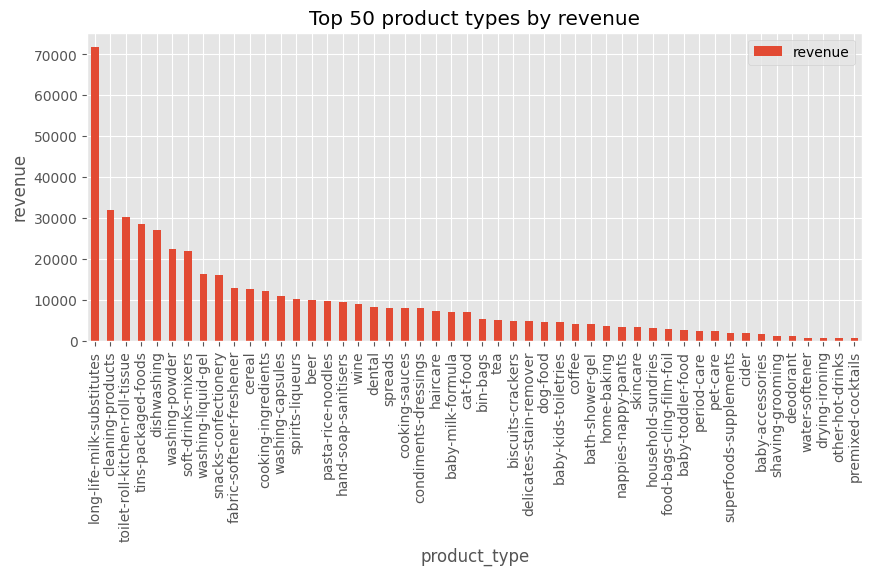

In [31]:
top_product_type_by_revenue = (
    order_items_with_price.groupby("product_type")
    .agg({"price": "sum"})
    .rename(columns={"price": "revenue"})
    .sort_values(by="revenue", ascending=False)
)
top_product_type_by_revenue.iloc[:50].plot(kind="bar", figsize=(10, 4))
plt.title("Top 50 product types by revenue")
plt.xlabel("product_type")
plt.ylabel("revenue")

Text(0, 0.5, 'Percentage of Orders (%)')

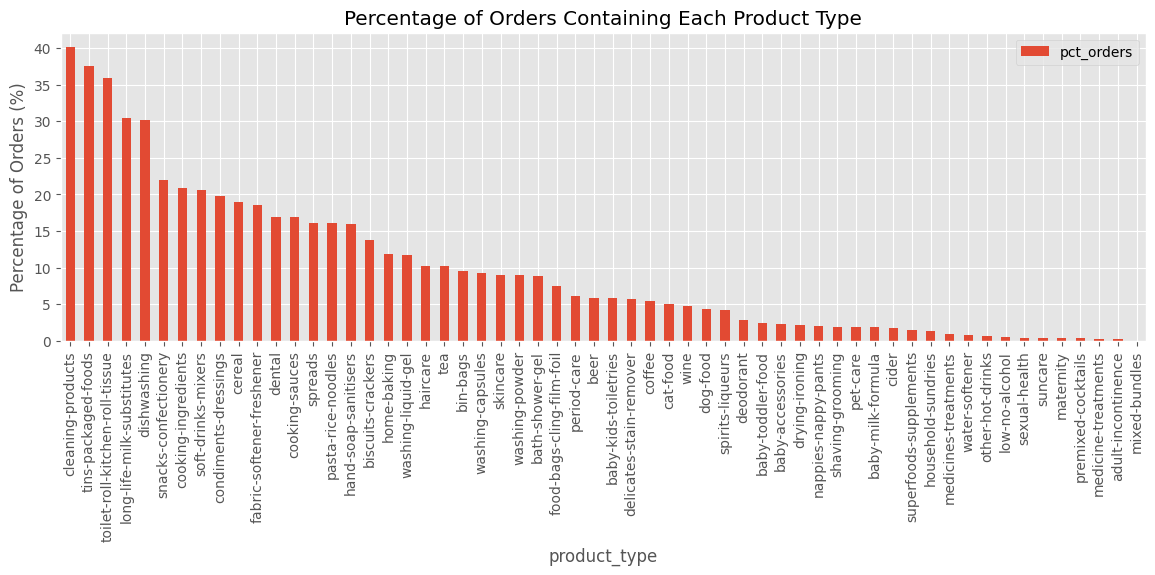

In [32]:
def compute_order_composition(df: pd.DataFrame) -> pd.DataFrame:
    total_orders = df["id"].nunique()
    return (
        df.drop_duplicates(subset=["id", "product_type"])
        .groupby("product_type")["id"]
        .nunique()
        .reset_index()
        .rename(columns={"id": "n_orders"})
        .assign(pct_orders=lambda x: 100*x.n_orders / total_orders)
    )


# Orders composition by product types
order_composition_by_product_type = compute_order_composition(
    order_items_with_price
).sort_values(by="pct_orders", ascending=False)
order_composition_by_product_type.plot(kind="bar", x="product_type", y="pct_orders", figsize=(14,4))
plt.title("Percentage of Orders Containing Each Product Type")
plt.ylabel("Percentage of Orders (%)")


Text(0, 0.5, 'Percentage of Inventory (%)')

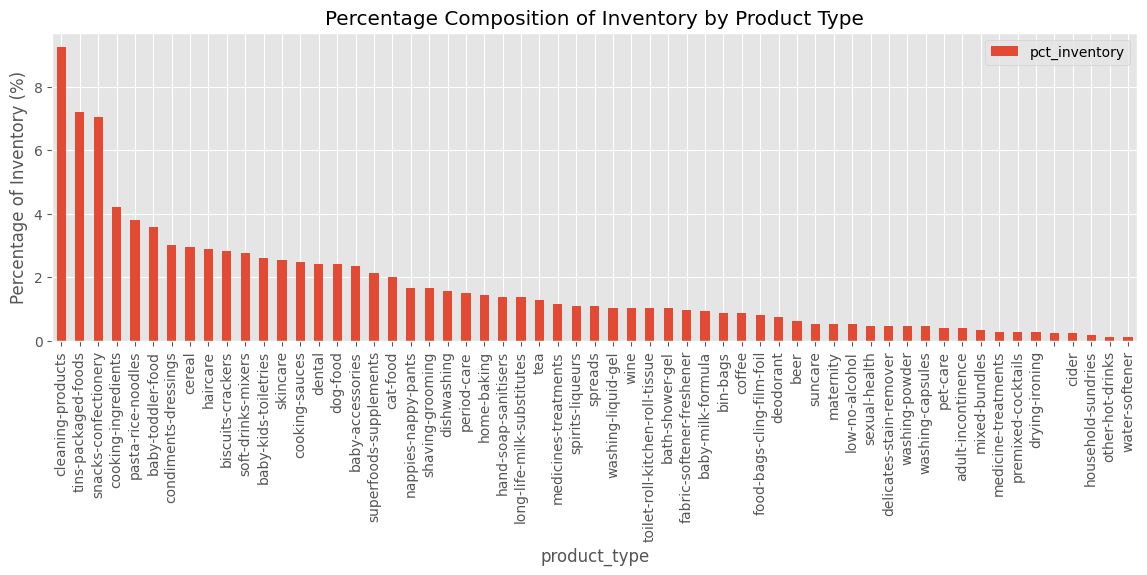

In [33]:
def compute_inventory_composition(df: pd.DataFrame) -> pd.DataFrame:
    total_products = df["variant_id"].nunique()
    return (
        df.groupby("product_type")["variant_id"]
        .nunique()
        .reset_index()
        .rename(columns={"variant_id": "n_products"})
        .assign(pct_inventory=lambda x: 100*x.n_products / total_products)
    )


# Inventory composition by product types
inventory_composition_by_product_type = compute_inventory_composition(
    df_inventory
).sort_values(by="pct_inventory", ascending=False)
inventory_composition_by_product_type.plot(kind="bar", x="product_type", y="pct_inventory", figsize=(14,4))
plt.title("Percentage Composition of Inventory by Product Type")
plt.ylabel("Percentage of Inventory (%)")

In [34]:
order_inventory_rank = (
    order_composition_by_product_type.merge(
        inventory_composition_by_product_type, how="left", on="product_type"
    )
    .assign(order_rank=lambda x: x.pct_orders.rank(ascending=False))
    .assign(inventory_rank=lambda x: x.pct_inventory.rank(ascending=False))
)
order_inventory_rank.head(15)

,product_type,n_orders,pct_orders,n_products,pct_inventory,order_rank,inventory_rank
0,cleaning-products,3500,40.110016,160,9.232545,1.0,1.0
1,tins-packaged-foods,3281,37.600275,125,7.212926,2.0,2.0
2,toilet-roll-kitchen-roll-tissue,3131,35.881274,18,1.038661,3.0,32.5
3,long-life-milk-substitutes,2657,30.449232,24,1.384882,4.0,25.5
4,dishwashing,2632,30.162732,27,1.557992,5.0,22.0
5,snacks-confectionery,1920,22.003209,122,7.039815,6.0,3.0
6,cooking-ingredients,1817,20.822828,73,4.212349,7.0,4.0
7,soft-drinks-mixers,1793,20.547788,48,2.769763,8.0,11.0
8,condiments-dressings,1732,19.848728,52,3.000577,9.0,7.0
9,cereal,1653,18.943388,51,2.942874,10.0,8.0


There some product types that are really frequent in orders but that they\
do not represent the same proportion of importance in the inventory.

Text(0, 0.5, 'Number of orders')

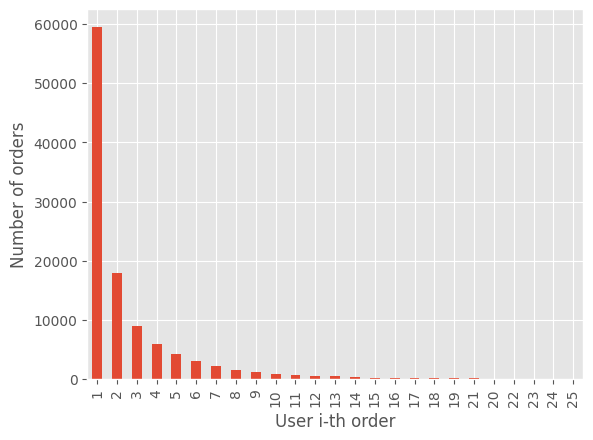

In [35]:
order_items["user_order_seq"].value_counts().plot(kind="bar")
# plt.title("")
plt.xlabel("User i-th order")
plt.ylabel("Number of orders")

### Insights

1. The clear bestseller of our products is the `oatly milk`. Why? Is it correctly priced?
2. The products that give the most revenue seem to be sold as a `pack`. How profitable\
   are they? Should we add more product packs
3. The most popular vendors have `ecologic` and/or `household` products. Consider\
   adding more ecological brands or products
4. The most sold product types and that also, normally bought in basket orders are:\
   `cleaning-products`, `tins-packaged-foods`, `toilet-roll-kitchen-tissue`,\
   `long-life-milk-substitutes`, `dishwashing`.
5. There is a discrepancy on the percentage of the product_types that appear the most
   in orders and the proportion they represent in our inventory.

   Should we explore increasing the variety of products offered in the
   product_type that are the frequent in orders?

   On the other hand, should we explore decreasing in our inventory those
   product_type that are less popular?

   For example, toilet-roll-kitchen-roll-tissue product_type appears the 3rd
   most in orders, however, in our inventory it only represents the 32nd
   product_type of our inventory.

   Observation: We do not know the quantity they represent in inventory,\
   only the number of different products in that category.


## 2.2 User profiling
Hypothesis:
- There are users that will buy certain product-types depending on if they
  have children, babies and/or pets.
- Users who have bought a baby or pet product, could have one.

What to do:
- Obtain the percentage of users with children, babies and/or pets.

In [36]:
# Obtain percentage of users with children, babies and pets
questionnaire_users = df_users.dropna(subset=["count_people"])
filtered_questionnaire_users = questionnaire_users[questionnaire_users["count_people"] != 0.0]

filter_children = filtered_questionnaire_users["count_children"] > 0.0
num_users_with_children = filter_children.sum()

filter_babies = filtered_questionnaire_users["count_babies"] > 0.0
num_users_with_babies = filter_babies.sum()

filter_pets = filtered_questionnaire_users["count_pets"] > 0.0
num_users_with_pets = filter_pets.sum()

num_users_questionnaire = filtered_questionnaire_users.shape[0]
num_users_with_children_and_pets = (filter_children & filter_pets).sum()

print(f"Total number of users: {len(df_users)}")
print(f"Num. of users that answered the questionnaire: {num_users_questionnaire}")
print(f"Pct of users that answered the questionnaire: {100*num_users_questionnaire/len(df_users):.2f}%")
print(f"Pct of users with children: {100*num_users_with_children/num_users_questionnaire:.2f}%")
print(f"Pct of users with babies: {100*num_users_with_babies/num_users_questionnaire:.2f}%")
print(f"Pct of users with pets: {100*num_users_with_pets/num_users_questionnaire:.2f}%")
print(
    f"Pct of users with both children and pets: {100*num_users_with_children_and_pets/num_users_questionnaire:.2f}%"
)

Total number of users: 4983
Num. of users that answered the questionnaire: 323
Pct of users that answered the questionnaire: 6.48%
Pct of users with children: 40.25%
Pct of users with babies: 7.12%
Pct of users with pets: 40.25%
Pct of users with both children and pets: 22.29%


Because we are only considering the users that answered the questionnaire, the\
results may be biased. It could be that users that have children or pets tend to\
be the ones who are willing to answer the questionnaire.

Let's try to get the same information from the orders. We will consider that\
users who have bought a pet or baby product, possibly have one.

In [37]:

order_items_with_price["product_type"].unique()

array(['dental', 'delicates-stain-remover', 'fabric-softener-freshener',
       'cleaning-products', 'haircare', 'washing-liquid-gel',
       'baby-kids-toiletries', 'toilet-roll-kitchen-roll-tissue',
       'deodorant', 'condiments-dressings', 'food-bags-cling-film-foil',
       'hand-soap-sanitisers', 'dishwashing', 'bin-bags', 'skincare',
       'cooking-sauces', 'spreads', 'snacks-confectionery',
       'pasta-rice-noodles', 'tins-packaged-foods', 'coffee',
       'home-baking', 'cooking-ingredients', 'cereal', 'bath-shower-gel',
       'washing-powder', 'tea', 'soft-drinks-mixers', 'period-care',
       'drying-ironing', 'baby-toddler-food', 'washing-capsules',
       'pet-care', 'cat-food', 'shaving-grooming',
       'long-life-milk-substitutes', 'suncare', 'dog-food',
       'superfoods-supplements', 'biscuits-crackers',
       'nappies-nappy-pants', 'household-sundries', 'water-softener',
       'baby-accessories', 'beer', 'premixed-cocktails', 'maternity',
       'baby-milk-fo

In [38]:
order_items_with_price.head(3)

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."


We will focus on pet and baby products because they are the most specific\
compared to the children ones.

In [39]:
# Product types that are related to pets and babies
pet_product_types = [
    "pet-care",
    "cat-food",
    "dog-food",
]
baby_product_types = [
    "baby-kids-toiletries",
    "baby-toddler-food",
    "nappies-nappy-pants",
    "baby-accessories",
    "maternity",
    "baby-milk-formula",
]

def num_rows_with_common_elements(df: pd.DataFrame, array: list[str]) -> int:
    count = 0
    for index, row in df.iterrows():
        common_elements = set(row['product_type']).intersection(array)
        if common_elements:
            count += 1
    return count

num_users_with_order = order_items_with_price["user_id"].nunique()

users_product_types_in_orders = order_items_with_price.groupby("user_id")["product_type"].unique().reset_index()
num_users_order_baby = num_rows_with_common_elements(users_product_types_in_orders, baby_product_types)
num_users_order_pets = num_rows_with_common_elements(users_product_types_in_orders, pet_product_types)
print(f"Num. of users with atleast an order: {num_users_with_order}")
print(f"Pct of users with babies by orders: {num_users_order_baby*100/num_users_with_order:.2f}%")
print(f"Pct of users with pets by orders: {num_users_order_pets*100/num_users_with_order:.2f}%")

Num. of users with atleast an order: 4948
Pct of users with babies by orders: 13.66%
Pct of users with pets by orders: 11.78%


In [40]:
users_with_pets = filtered_questionnaire_users[filter_pets]["user_id"]
filt_users_with_pets_orders = order_items_with_price["user_id"].isin(users_with_pets)
users_with_pets_orders_product_type = order_items_with_price[filt_users_with_pets_orders].groupby("user_id")["product_type"].unique().reset_index()
num_users_with_pets_that_bought_pet_product = num_rows_with_common_elements(users_with_pets_orders_product_type, pet_product_types)


users_with_babies = filtered_questionnaire_users[filter_babies]["user_id"]
filt_users_with_babies_orders = order_items_with_price["user_id"].isin(users_with_babies)
users_with_babies_orders_product_type = order_items_with_price[filt_users_with_babies_orders].groupby("user_id")["product_type"].unique().reset_index()
num_users_with_babies_that_bought_baby_product = num_rows_with_common_elements(users_with_babies_orders_product_type, baby_product_types)

print(f"Pct of users with pets that have bought a pet product: {100*num_users_with_pets_that_bought_pet_product/len(users_with_pets):.2f}%")
print(f"Pct of users with babies that have bought a baby product: {100*num_users_with_babies_that_bought_baby_product/len(users_with_babies):.2f}%")

Pct of users with pets that have bought a pet product: 29.23%
Pct of users with babies that have bought a baby product: 43.48%


### Insights
- Only 6.48% of the users answer the questionnaire. It is in our interest, that\
  more users answer it, so that we can target them with ads about specific products.\
  How can we increase the number of users that answer it? Providing a discount?
- It is possible that users who have pets are more open to answer the questionnaire.
- 29.23% of users who answered that they have pets have bought a pet product.
- 43.48% of users who answered that they have babies have bought a baby product.

#### User information extracted from questionnaire
- 40.25% of the users who answered the questionnaire have children.
- 7.12% of the users who answered the questionnaire have babies.
- 40.25% of the users who answered the questionnaire have pets.
- To these users, we can think about targeting them with ads about products\
  related to babies and/or pets because we know for sure that they have babies\
  and/or pets.

#### User information extracted from orders
- 13.66% of the users who have made at least an order, have bought a baby product.
- 11.78% of the users who have made at least an order, have bought a pet product.
- We can observe that the percentage of users with pets we got from the\
  questionnaire, could be an overestimation of the real percentage.